In [42]:
#import neccesary libraries

import time
import numpy as np
import pandas as pd
import matplotlib as mb
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings

# Decorator for measuring execution time
def calculate_execution_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Execution time for {func.__name__}: {execution_time} seconds")
        return result
    return wrapper


In [43]:
# Load the dataset function
@calculate_execution_time
def load_dataset(file_path):
    data = pd.read_csv(file_path)
    return data
file_path="C:\\Users\\hkesa\\Desktop\\Customers.csv"




In [44]:
#Load the dataset and show execution time

data=load_dataset(file_path)
plt.tight_layout()

Execution time for load_dataset: 0.009674549102783203 seconds


<Figure size 432x288 with 0 Axes>

In [45]:
#see the first 5 column
df.to_string()
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size,Age_Categories
0,1,Male,19,15000,39,Healthcare,1,4,NaN
1,2,Male,21,35000,81,Engineer,3,3,NaN
2,3,Female,20,86000,6,Engineer,1,1,NaN
3,4,Female,23,59000,77,Lawyer,0,2,NaN
4,5,Female,31,38000,40,Entertainment,2,6,"(25.0, 36.0]"


In [46]:
#clean the data based on age and categorize the age

df = pd.DataFrame(data)
df = df.loc[df["Age"] > 17]
df = df.loc[df["Age"] < 66]



df["Age_Categories"] = pd.cut(df["Age"], bins=[25,36,46,56,65])

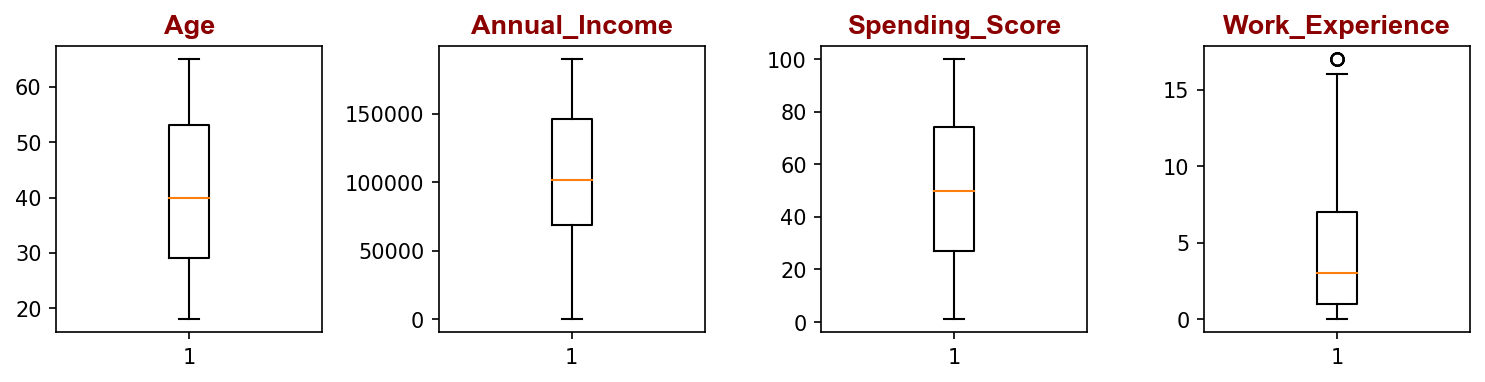

In [47]:
#define title and axis font and create boxplot based on Age, Annual_Income, Spending_Score and Work Experience

title_font={'family':'arial','color':'darkred','weight':'bold','size':13}
axis_font={'family':'arial','color':'darkblue','weight':'bold','size':10}

plt.figure(figsize=(10,7),dpi=150)
fill_list=['Age','Annual_Income','Spending_Score','Work_Experience']
for i,col in enumerate(fill_list):
    plt.subplot(3,4,i+1)
    plt.boxplot(col, data=df)
    plt.title(col,fontdict=title_font)
plt.tight_layout()
plt.show()


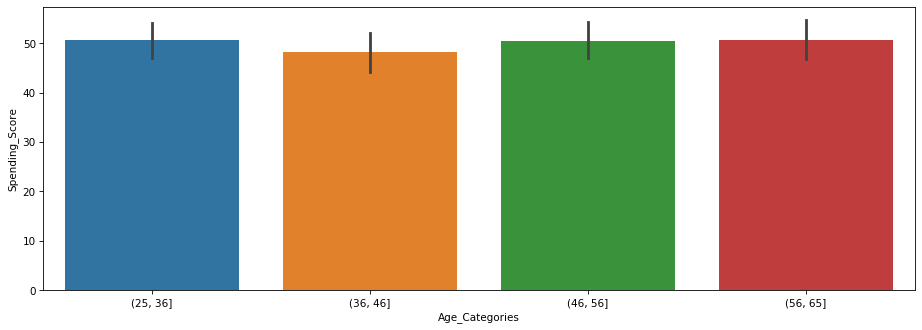

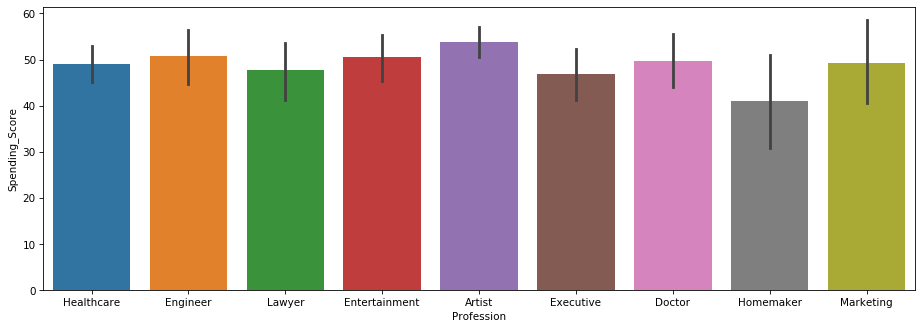

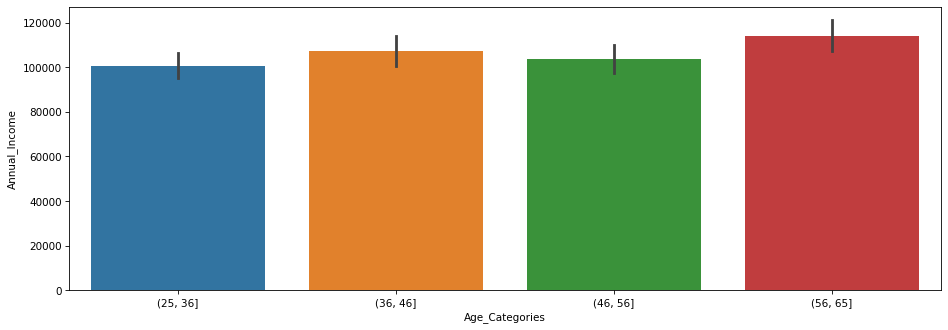

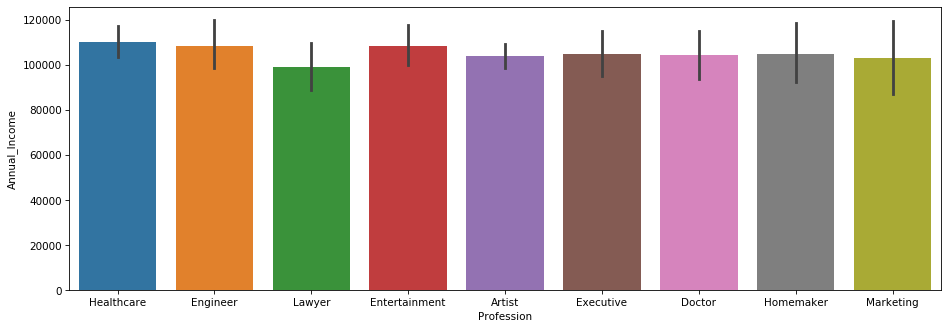

In [48]:
#create barplot based on Spending_Score and Annual_Income for Profession and Age_Categories

plt.figure(figsize=(15,5),dpi=75)
sns.barplot(x=df.Age_Categories,y=df.Spending_Score)
plt.show()

plt.figure(figsize=(15,5),dpi=75)
sns.barplot(x=df.Profession,y=df.Spending_Score)
plt.title('')
plt.show()

plt.figure(figsize=(15,5),dpi=75)
sns.barplot(x=df.Age_Categories,y=df.Annual_Income)
plt.show()

plt.figure(figsize=(15,5),dpi=75)
sns.barplot(x=df.Profession,y=df.Annual_Income)
plt.title('')
plt.show()

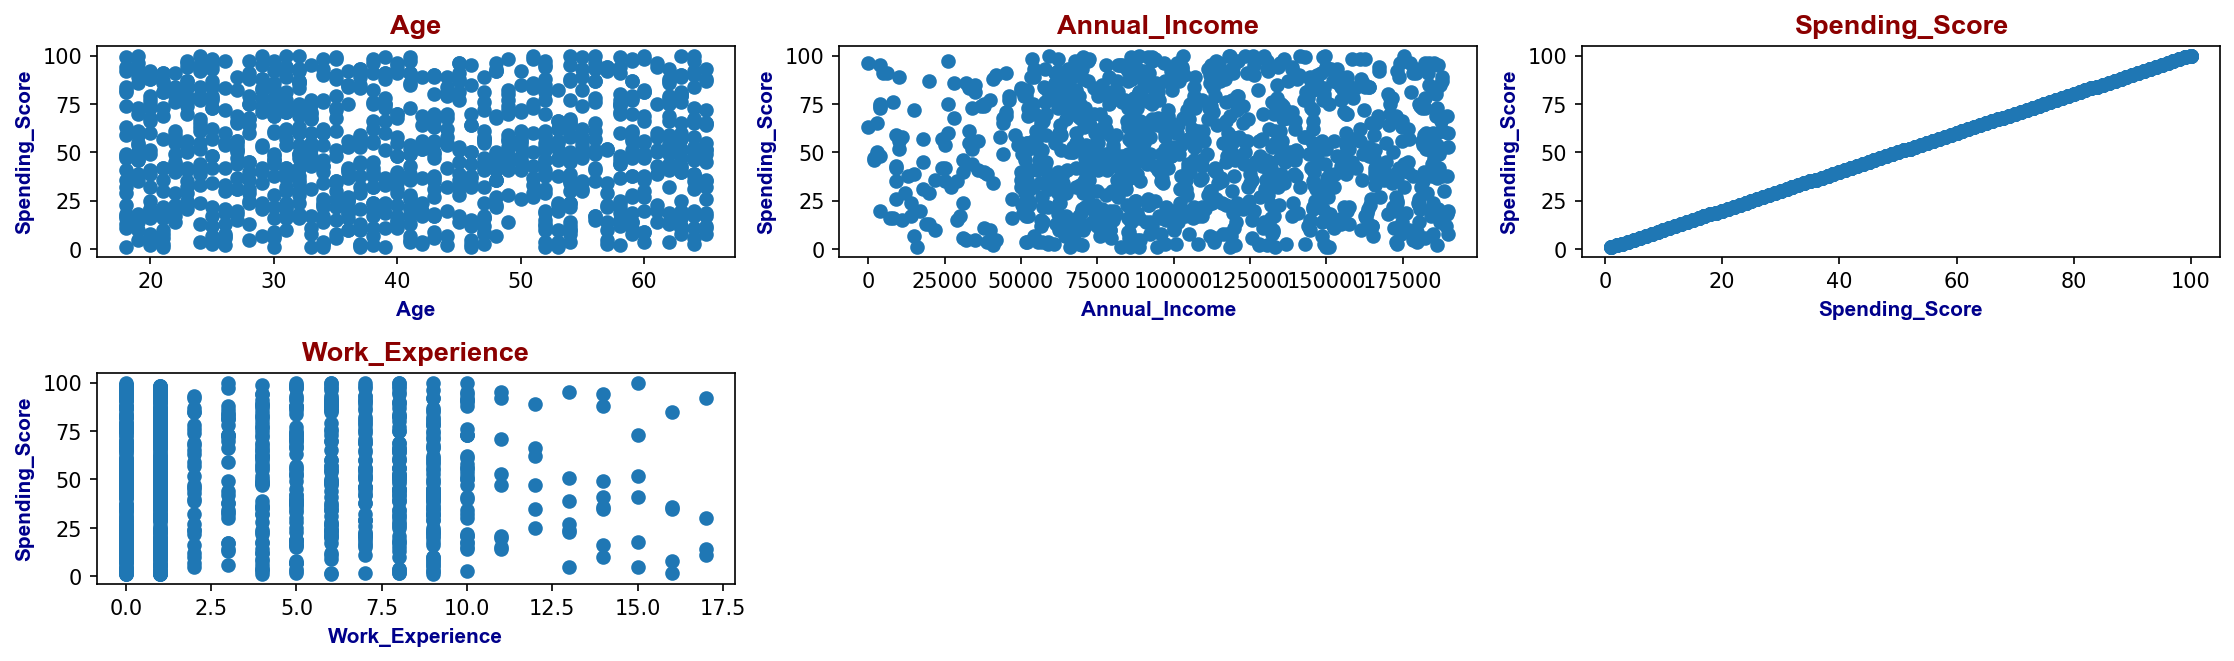

In [49]:
#create subplot based on Spending_Score for 'Age_Categories','Annual_Income','Work_Experience'

plt.figure(figsize=(15,15),dpi=150)
fill_list2=['Age_Categories','Annual_Income','Work_Experience']
for i,col in enumerate(fill_list):
    plt.subplot(7,3,i+1)
    plt.scatter(col,'Spending_Score', data=df)
    plt.title(col,fontdict=title_font)
    plt.xlabel(col,fontdict=axis_font)
    plt.ylabel('Spending_Score',fontdict=axis_font)
plt.tight_layout()
plt.show()


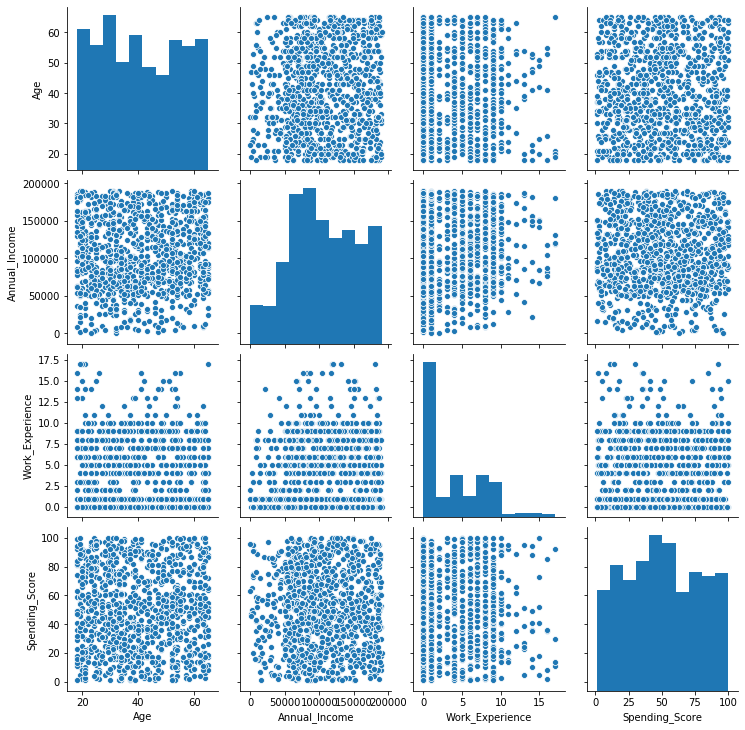

In [50]:
#create subplot for 'Age', 'Annual_Income', 'Work_Experience', 'Spending_Score'

sns.pairplot(df[['Age', 'Annual_Income', 'Work_Experience', 'Spending_Score']])
plt.show()

In [51]:
#see describe of DATA for "Age", "Annual_Income","Spending_Score","Work_Experience"

df[["Age", "Annual_Income","Spending_Score","Work_Experience"]].describe()

,Age,Annual_Income,Spending_Score,Work_Experience
count,1027.000000,1027.000000,1027.000000,1027.000000
mean,40.984421,105689.828627,50.515093,3.915287
std,14.068329,47860.942415,27.868819,3.894269
min,18.000000,0.000000,1.000000,0.000000
25%,29.000000,69024.500000,27.000000,1.000000
50%,40.000000,101698.000000,50.000000,3.000000
75%,53.000000,146208.000000,74.000000,7.000000
max,65.000000,189945.000000,100.000000,17.000000


In [53]:
# Business Case = Customer Analysis for our shop to manage marketing operations
# Your data science/programming team head = clean the data and make sense of the data
# The CEO = Accelerate campaign efforts for clients based on output